In [8]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import nibabel as nib
import os
import matplotlib.pyplot as plt

## Data

In [4]:
ROOT_DIR = "../"
DATA_DIR = f'{ROOT_DIR}data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData'

In [6]:
!ls $DATA_DIR | head

BraTS20_Training_001
BraTS20_Training_002
BraTS20_Training_003
BraTS20_Training_004
BraTS20_Training_005
BraTS20_Training_006
BraTS20_Training_007
BraTS20_Training_008
BraTS20_Training_009
BraTS20_Training_010


In [13]:
patient_folders = [os.path.join(DATA_DIR, f) for f in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, f))]
patient_folders[0:10]

['../data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_243',
 '../data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_118',
 '../data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_164',
 '../data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_166',
 '../data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_112',
 '../data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_290',
 '../data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_206',
 '../data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_341',
 '../data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_107',
 '../data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_140']

### Displaying a random slice

In [17]:
patient_folder = patient_folders[0]
patient_id = os.path.basename(patient_folder)
!ls $patient

BraTS20_Training_243_flair.nii	BraTS20_Training_243_t1.nii
BraTS20_Training_243_seg.nii	BraTS20_Training_243_t2.nii
BraTS20_Training_243_t1ce.nii


In [20]:
modalities = ["_flair", "_t1", "_t1ce", "_t2"]
images = [nib.load(os.path.join(patient_folder, f'{patient_id}{m}.nii')).get_fdata() for m in modalities]
segmentation = nib.load(os.path.join(patient_folder, f'{patient_id}_seg.nii')).get_fdata()

In [22]:
# normalize
images = np.stack([img / np.max(img) for img in images], axis=0)  # shape (4, H, W, D)
print("Loaded:", images.shape, "segmentation:", segmentation.shape)

Loaded: (4, 240, 240, 155) mask: (240, 240, 155)


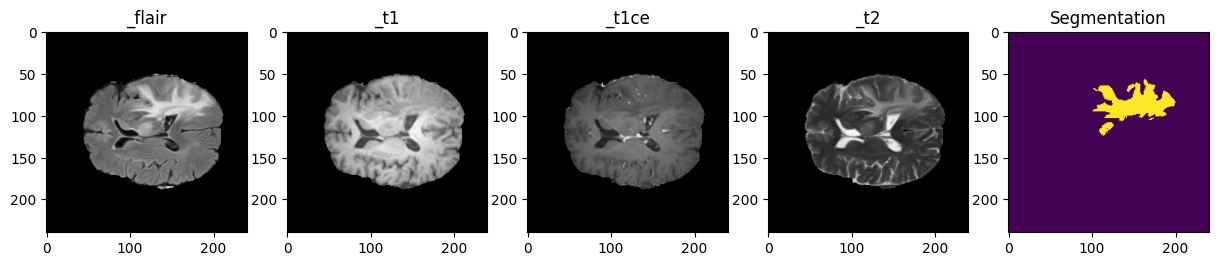

In [23]:
# visualise a slice
slice_idx = segmentation.shape[-1] // 2
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, modality in enumerate(modalities):
    axes[i].imshow(images[i, :, :, slice_idx], cmap='gray')
    axes[i].set_title(modality)
axes[-1].imshow(segmentation[:, :, slice_idx])
axes[-1].set_title("Segmentation")
plt.show()